# **Случайный лес. Контрольное задание**

# **1. Подготовка исходных данных**

Сгенерировать исходные данные для обучения модели случайного леса.

Значения параметров выбираются из таблиц в файле "Варианты".docx в соответствие с номером студента в списке группы в СДО.

Для задачи классификации.

Для задачи регрессии.

In [1]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 542,
                       n_features = 2,
                       n_informative = 1,
                       noise = 10.3,
                       random_state = 10)

Разделить выборку на обучающую и тестовую.

Доля объектов в тестовой выборке - 0,3.

Использовать параметр `random_state` в соответствие со своим вариантом.

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 10)
X_train.shape

(379, 2)

# **2. Обучение модели**

Обучить модель случайного леса на тренировочной выборке с гиперпараметрами по умолчанию.

In [3]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state = 10)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

# **3. Оценивание качества модели**

**Для задачи регрессии**:

Вычислить метрики MSE и R2 для обучающей и тестовой выборок.

In [4]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = rf_reg.predict(X_train)
y_test_pred = rf_reg.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'mse на тренировочной: {mse_train:.2f}, на тестовой: {mse_test:.2f}')
print(f'r2 на тренировочной: {r2_train:.2f}, на тестовой: {r2_test:.2f}')

mse на тренировочной: 17.86, на тестовой: 107.31
r2 на тренировочной: 1.00, на тестовой: 0.98


Сделать вывод о качестве модели.

# **4. Подбор оптимальных гиперпараметров модели случайного леса**

Осуществить подбор гиперараметров модели случайного леса:
- `n_estimators`;
- `max_depth`;
- `min_samples_leaf`;
- `max_features`.

## Использование валидационных кривых

Построить валидационные кривые для оценивания оптимального диапазона изменения гиперпараметров.

Параметр кросс-валидации - 5.

Метрика качества модели случайного леса:
- для классификации - accuracy;
- для регрессии - R2.

Построить валидационные кривые для гиперпараметра `n_estimators`.

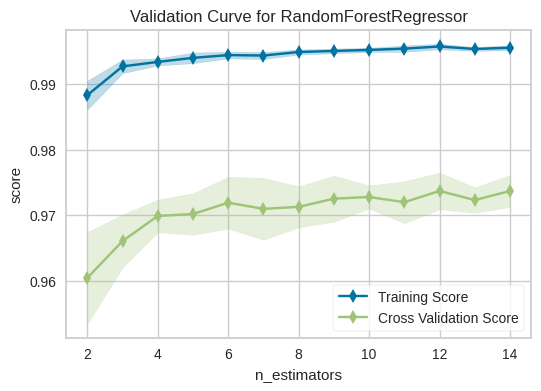

In [5]:
from yellowbrick.model_selection import ValidationCurve
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (6,4))

viz = ValidationCurve(RandomForestRegressor(),
                      random_state = 10,
                      param_name = 'n_estimators',
                      param_range = np.arange(2, 15),
                      score = 'r2',
                      cv = 5)

viz.fit(X_train, y_train)
viz.show();

Обучить модель случайного леса с оптимальным значением гиперпараметра `n_estimators` и оценить качество модели на обучающей и тестовой выборках по соответствующей метрике.

In [6]:
from sklearn.ensemble import RandomForestRegressor
rf_reg_estimators = RandomForestRegressor(random_state = 10,
                                          n_estimators = 4)
rf_reg_estimators.fit(X_train, y_train)

RandomForestRegressor(n_estimators=4, random_state=10)

In [7]:
y_train_pred_est = rf_reg_estimators.predict(X_train)
y_test_pred_est = rf_reg_estimators.predict(X_test)

mse_train_est = mean_squared_error(y_train, y_train_pred_est)
mse_test_est = mean_squared_error(y_test, y_test_pred_est)

r2_train_est = r2_score(y_train, y_train_pred_est)
r2_test_est = r2_score(y_test, y_test_pred_est)

print(f'Тренировочная MSE: {mse_train_est:.2f}, R2: {r2_train_est:.2f}')
print(f'Тестовая: MSE: {mse_test_est:.2f}, R2: {r2_test_est:.2f}')

Тренировочная MSE: 29.67, R2: 0.99
Тестовая: MSE: 124.47, R2: 0.97


Построить валидационные кривые для гиперпараметра `max_depth`.

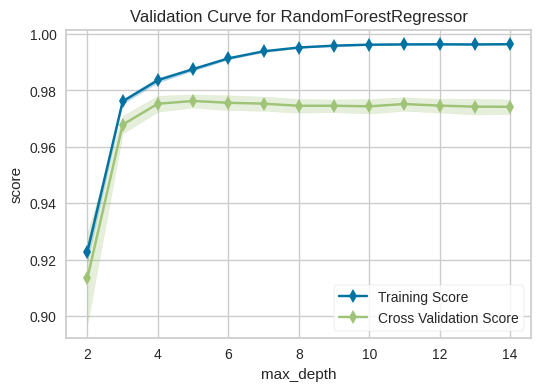

In [8]:
from yellowbrick.model_selection import ValidationCurve
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (6,4))

viz = ValidationCurve(RandomForestRegressor(),
                      random_state = 10,
                      param_name = 'max_depth',
                      param_range = np.arange(2, 15),
                      score = 'r2',
                      cv = 5)

viz.fit(X_train, y_train)
viz.show();

Обучить модель случайного леса с оптимальным значением гиперпараметра `max_depth` и зафиксированном на предыдущем шаге значением гиперпараметра `n_estimators`.

Оценить качество модели на обучающей и тестовой выборках по соответствующей метрике.

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf_reg_temp = RandomForestRegressor(random_state = 10,
                                    n_estimators = 4,
                                    max_depth = 5)
rf_reg_temp.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=4, random_state=10)

In [10]:
y_train_pred_temp = rf_reg_temp.predict(X_train)
y_test_pred_temp = rf_reg_temp.predict(X_test)

mse_train_temp = mean_squared_error(y_train, y_train_pred_temp)
mse_test_temp = mean_squared_error(y_test, y_test_pred_temp)

r2_train_temp = r2_score(y_train, y_train_pred_temp)
r2_test_temp = r2_score(y_test, y_test_pred_temp)

print(f'Тренировочная MSE: {mse_train_temp:.2f}, R2: {r2_train_temp:.2f}')
print(f'Тестовая: MSE: {mse_test_temp:.2f}, R2: {r2_test_temp:.2f}')

Тренировочная MSE: 73.54, R2: 0.99
Тестовая: MSE: 114.44, R2: 0.97


Построить валидационные кривые для гиперпараметра `min_samples_leaf`.

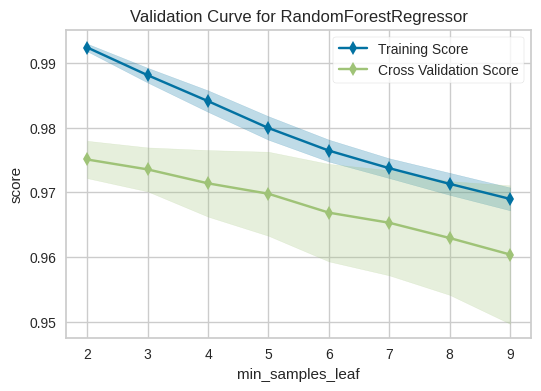

In [11]:
from yellowbrick.model_selection import ValidationCurve
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (6,4))

viz = ValidationCurve(RandomForestRegressor(),
                      random_state = 10,
                      param_name = 'min_samples_leaf',
                      param_range = np.arange(2, 10),
                      score = 'r2',
                      cv = 5)

viz.fit(X_train, y_train)
viz.show();

Обучить модель случайного леса с оптимальным значением гиперпараметра `min_samples_leaf` и зафиксированными на предыдущих шагах значениями гиперпараметров `n_estimators` и `max_depth`.

Оценить качество модели на обучающей и тестовой выборках по соответствующей метрике.

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf_reg_temp2 = RandomForestRegressor(random_state = 10,
                                    n_estimators = 4,
                                    max_depth = 5,
                                    min_samples_leaf = 4)
rf_reg_temp2.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=4, n_estimators=4,
                      random_state=10)

In [28]:
y_train_pred_temp2 = rf_reg_temp2.predict(X_train)
y_test_pred_temp2 = rf_reg_temp2.predict(X_test)

mse_train_temp2 = mean_squared_error(y_train, y_train_pred_temp2)
mse_test_temp2 = mean_squared_error(y_test, y_test_pred_temp2)

r2_train_temp2 = r2_score(y_train, y_train_pred_temp2)
r2_test_temp2 = r2_score(y_test, y_test_pred_temp2)

print(f'Тренировочная MSE: {mse_train_temp2:.2f}, R2: {r2_train_temp2:.2f}')
print(f'Тестовая: MSE: {mse_test_temp2:.2f}, R2: {r2_test_temp2:.2f}')

Тренировочная MSE: 82.77, R2: 0.98
Тестовая: MSE: 117.00, R2: 0.97


Построить валидационные кривые для гиперпараметра `max_features`.

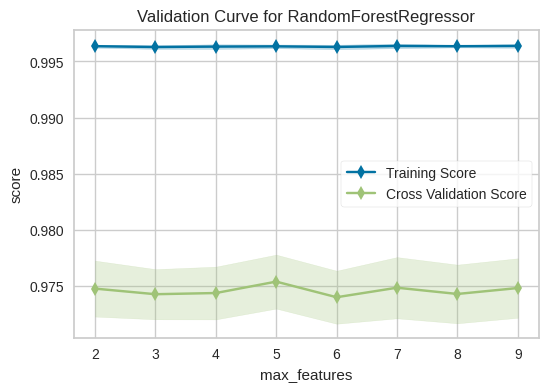

In [29]:
plt.figure(figsize = (6,4))

viz = ValidationCurve(RandomForestRegressor(),
                      random_state = 10,
                      param_name = 'max_features',
                      param_range = np.arange(2, 10),
                      score = 'r2',
                      cv = 5)

viz.fit(X_train, y_train)
viz.show();

Обучить модель случайного леса с оптимальным значением гиперпараметра `max_features` и зафиксированными на предыдущих шагах значениями гиперпараметров `n_estimators`, `max_depth` и `min_samples_leaf`.

Оценить качество модели на обучающей и тестовой выборках по соответствующей метрике.

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf_reg_fin = RandomForestRegressor(random_state = 10,
                                    n_estimators = 4,
                                    max_depth = 5,
                                    min_samples_leaf = 4,
                                   max_features = 2)
rf_reg_fin.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=2, min_samples_leaf=4,
                      n_estimators=4, random_state=10)

In [31]:
y_train_pred_fin = rf_reg_fin.predict(X_train)
y_test_pred_fin = rf_reg_fin.predict(X_test)

mse_train_fin = mean_squared_error(y_train, y_train_pred_fin)
mse_test_fin = mean_squared_error(y_test, y_test_pred_fin)

r2_train_fin = r2_score(y_train, y_train_pred_fin)
r2_test_fin = r2_score(y_test, y_test_pred_fin)

print(f'Тренировочная MSE: {mse_train_fin:.2f}, R2: {r2_train_fin:.2f}')
print(f'Тестовая: MSE: {mse_test_fin:.2f}, R2: {r2_test_fin:.2f}')

Тренировочная MSE: 82.77, R2: 0.98
Тестовая: MSE: 117.00, R2: 0.97


## Поиск на сетке

Определить оптимальные значения гиперпараметров модели случайного леса с использованием поиска на сетке.

Использовать `random_state` - номер варианта.

In [32]:
param_reg = {'max_depth': np.arange(2, 9),
             'min_samples_leaf': np.arange(1, 15),
             'max_features': np.arange(5, 15),
             'n_estimators': np.arange(2,15)}

from sklearn.model_selection import GridSearchCV
rf_reg = GridSearchCV(RandomForestRegressor(random_state = 10),
                        param_grid = param_reg,
                        cv = 5,
                        scoring = 'r2')

rf_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8]),
                         'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='r2')

Вывести оптимальные значения гиперпараметров.

In [33]:
rf_reg.best_estimator_

RandomForestRegressor(max_depth=np.int64(5), max_features=np.int64(5),
                      min_samples_leaf=np.int64(2), n_estimators=np.int64(12),
                      random_state=10)

Обучить модель случайного леса с найденными оптимальными значениями гиперпараметров.

In [35]:
tree_reg_grid = rf_reg.best_estimator_
tree_reg_grid

RandomForestRegressor(max_depth=np.int64(5), max_features=np.int64(5),
                      min_samples_leaf=np.int64(2), n_estimators=np.int64(12),
                      random_state=10)

Вычислить метрику качества модели случайного леса на обучающей и тестовой выборках:
- для задачи классификации - accuracy;
- для задачи регрессии - R2.

In [36]:
y_train_pred_clf = tree_reg_grid.predict(X_train)
y_test_pred_clf = tree_reg_grid.predict(X_test)

mse_train_clf = mean_squared_error(y_train, y_train_pred_clf)
mse_test_clf = mean_squared_error(y_test, y_test_pred_clf)

r2_train_clf = r2_score(y_train, y_train_pred_clf)
r2_test_clf = r2_score(y_test, y_test_pred_clf)

print(f'Тренировочная MSE: {mse_train_clf:.2f}, R2: {r2_train_clf:.2f}')
print(f'Тестовая: MSE: {mse_test_clf:.2f}, R2: {r2_test_clf:.2f}')

Тренировочная MSE: 70.73, R2: 0.99
Тестовая: MSE: 107.10, R2: 0.98


# **5. Использование модели для предсказания**

Задать произвольный объект и определить:
- для задачи классификации - какому классу он будет принадлежать и вероятности принадлежности к каждому классу;
- для задачи регрессии - прогнозное значение целевого признака.

In [37]:
X_new = [[ -0.7, 1.4]]
y_new = tree_reg_grid.predict(X_new)
print(y_new)

[-50.95461842]


# **6. Оценивание важности признаков**

Оценить степень важности признаков методом Mean decrease impurity (MDI).

Использовать атрибут `feature_importances_` классов `RandomForestClassifier` или `RandomForestRegressor` .

In [44]:
tree_reg_grid.feature_importances_

array([0.99799436, 0.00200564])

Построить диаграмму `bar` для визуализации степени важности признаков.

In [45]:
import pandas as pd
feature_name = ['x1', 'x2']
df_imp = pd.DataFrame({'Признак': feature_name,
                       'Важность': tree_reg_grid.feature_importances_})
df_imp

,Признак,Важность
0,x1,0.997994
1,x2,0.002006


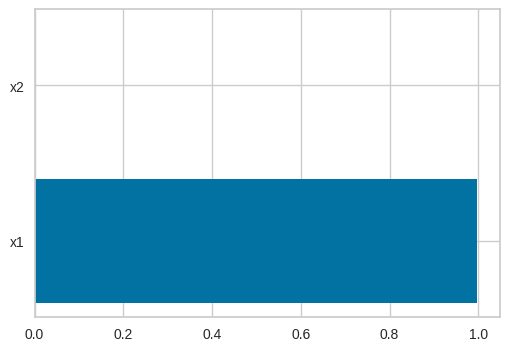

In [46]:
plt.figure(figsize = (6, 4))
plt.barh(df_imp['Признак'], df_imp['Важность'])
plt.show()

Оценить степень важности признаков методом Permutation feature importance.

Использовать лласс `permutation_importance` модуля `inspection` библиотеки `sklearn`.


In [47]:
from sklearn.inspection import permutation_importance
permutation_importance = permutation_importance(tree_reg_grid,
                                                X_train, y_train,
                                                n_repeats = 10,
                                                random_state = 10,
                                                n_jobs = -1)

permutation_importance

{'importances_mean': array([1.92385915e+00, 1.87225299e-03]),
 'importances_std': array([0.10426799, 0.00016766]),
 'importances': array([[1.81527950e+00, 2.15563251e+00, 1.96129892e+00, 2.03935911e+00,
         1.92932573e+00, 1.81752235e+00, 1.88452500e+00, 1.82912918e+00,
         1.95692857e+00, 1.84959069e+00],
        [1.66645348e-03, 1.76149869e-03, 1.69993189e-03, 1.63624860e-03,
         1.92265570e-03, 1.94936490e-03, 2.06745323e-03, 2.17078386e-03,
         1.92669347e-03, 1.92144613e-03]])}

Построить диаграмму `bar` для визуализации степени важности признаков.

In [48]:
sorted_id = np.argsort(permutation_importance.importances_mean)
pos = np.arange(len(sorted_id))
pos

array([0, 1])

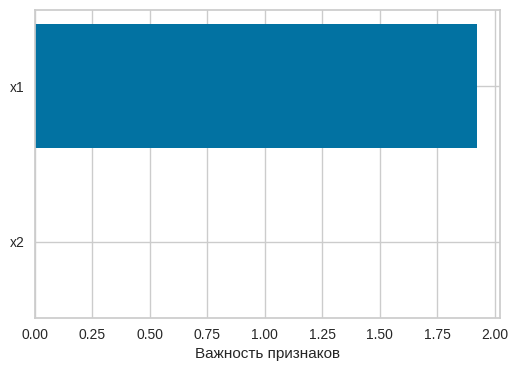

In [49]:
plt.figure(figsize = (6,4))
plt.barh(pos, permutation_importance.importances_mean[sorted_id])
plt.yticks(pos, np.array(feature_name)[sorted_id])
plt.xlabel('Важность признаков')
plt.show()